# Chart Overview

A wide variety of packages exist for generating charts and rich (style) tables directly from dataframe type data objects in Python and R.

Creating charts directly from datatables means that the charts re guaranteed to fairly represent the original data, as long as the chart definition is sound.

A variety of statistical charting packages also exist that perform statistical operations on the provided data before then rendering an appropriate statistical chart (examples include histogram charts than bin and count raw data values, for example).

This overview introduces some of the charting approaches that are possibly in a Python environment. Charting tools in R will be covered elsewhere.

## `seaborn` statistical charting package

The [`seaborn`](https://seaborn.pydata.org/) statistical data visualization package is a Python package that provides a wide range of chart types that can be used to generate static charts from *pandas* `Series` or `DataFrame` objects.

Conveniently, the package includes sample datasets that can be used to demonstrate the various available chart types.

In [ ]:
%%capture
try:
    import seaborn
except:
    %pip install seaborn

In [4]:
import seaborn as sns

View a fragment of a sample dataset:

In [5]:
df_penguins = sns.load_dataset("penguins")

df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


As an example of generating a statistical plot directly from the data, consider the construction of a histogram:

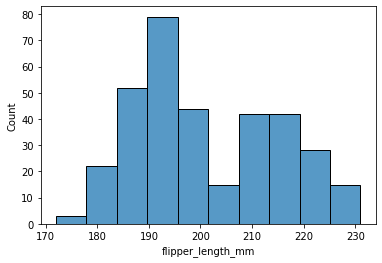

In [8]:
chart = sns.histplot(data=df_penguins, x="flipper_length_mm");

The bin widths and counts within bins are handled automatically by the chart based on the provided (raw) data.

In some teaching and learning examples, we may want learners to work through the steps involved in the data processing steps required to create the plot; but in other cases, where we just want to create the chart itself, using the statistical chart type (if we trust it!) is simpler.

We can also save the chart to a file and then load it back in to display it:

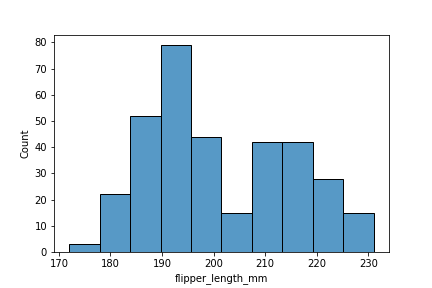

In [11]:
fn_sns = "sns_output.png"

chart.figure.savefig(fn_sns)

from IPython.display import Image
Image(fn_sns)

## Creating Interactive Charts

As well as creating static charts, a wide variety of packages exist that are capable of rendering interactive charts. One such example is the [`plotly`]() Python graphing library.

In [12]:
%%capture
try:
    import plotly
except:
    %pip install plotly

As with `seaborn`, various sample datasets are included in the package, such as the famous `iris` dataset:

In [15]:
import plotly.express as px

df_iris = px.data.iris()
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


Interactive charts can be created by calling the appropriate chart type with the dataframe and specifying which data columns should be used for which chart dimension.

The resulting chart is a fully interactive chart that includes tools for zooming and panning around the chart and interactively saving the current chart view to a file.

In [19]:
iris_plot = px.scatter(df_iris, x="sepal_width", y="sepal_length", color='petal_length')
iris_plot

# The HTML chart can also be saved to a file
#iris_plot.write_html("plotly_demo.html")